### Claude Shyaka
### ID#: 801326243

# Homework 3: Naive Bayes and PCA Feature Extraction

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.datasets import load_breast_cancer

# Seed for random state
seed = 42

# create heatmap
def create_heatmap(matrix):
    import seaborn as sns
    from matplotlib.colors import ListedColormap
    class_names = [0, 1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title("Confusion matrix", y=1.1)
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")

breast_cancer = load_breast_cancer()
breast_cancer_data = breast_cancer.data
breast_cancer_data.shape

(569, 30)

In [322]:
breast_cancer_data_df = pd.DataFrame(breast_cancer_data)
breast_cancer_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [323]:
breast_cancer_labels = breast_cancer.target
breast_cancer_labels.shape

(569,)

In [324]:
labels = np.reshape(breast_cancer_labels, (569,1))

In [325]:
final_breast_cancer_data = np.concatenate([breast_cancer_data, labels], axis=1)
final_breast_cancer_data.shape

(569, 31)

In [326]:
breast_cancer_dataset = pd.DataFrame(final_breast_cancer_data)

In [327]:
features = breast_cancer.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [328]:
features_labels = np.append(features, 'label')


In [329]:
breast_cancer_dataset.columns = features_labels


In [330]:
breast_cancer_dataset.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [331]:
breast_cancer_dataset['label'].replace(0, 'Benign', inplace=True)
breast_cancer_dataset['label'].replace(1, 'Malignant', inplace=True)

In [332]:
breast_cancer_dataset.tail()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [333]:
breast_cancer_dataset['label'].replace('Benign', 0, inplace=True)
breast_cancer_dataset['label'].replace('Malignant', 1, inplace=True)
breast_cancer_dataset.tail()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [334]:
X = breast_cancer_dataset.iloc[:, :30].values
Y = breast_cancer_dataset.iloc[:, 30].values

In [335]:
# Split the data into training and test set. 
# Train with 80% and testing with 20%.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, train_size=0.80, random_state=seed)

In [336]:
# create a scaler object, 
# Fit the scaler on the training data and transform 
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_sc = sc.transform(X_test)


Classification metrics:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



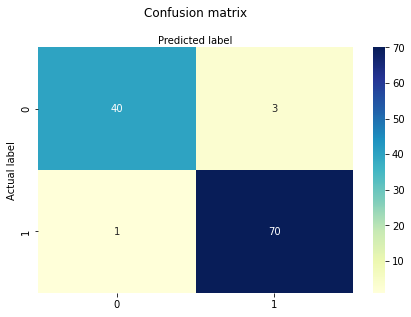

In [337]:
model = GaussianNB()

model.fit(X_train_sc, Y_train)
Y_pred = model.predict(X_test_sc)
report = classification_report(Y_test, Y_pred)
print('\nClassification metrics:\n', report)
matrix = confusion_matrix(Y_test, Y_pred)
create_heatmap(matrix)

## Problem 2

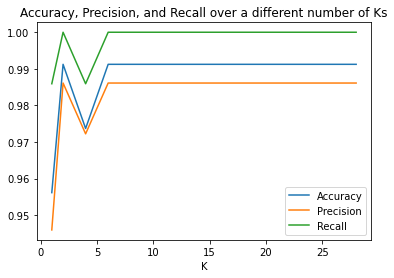

In [338]:
from sklearn import metrics

X_sc = sc.fit_transform(X)

from sklearn.decomposition import PCA 

K_vals = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
acc_list = []
prec_list = []
rec_list = []
for k in K_vals:

    pca = PCA(n_components=k) 
    principalComponents = pca.fit_transform(X_sc) 

    # Split the data into training and test set.
    # Train set is 80% of the data and the test set is 20%
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y, test_size = 0.20, train_size=0.80, random_state=seed)

    clf = LogisticRegression(penalty='l2', random_state=seed, C=0.04, solver='liblinear')
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    acc_list.append(metrics.accuracy_score(Y_test, Y_pred))
    prec_list.append(metrics.precision_score(Y_test, Y_pred))
    rec_list.append(metrics.recall_score(Y_test, Y_pred))

plt.plot(K_vals, acc_list, label="Accuracy")
plt.plot(K_vals, prec_list, label="Precision")
plt.plot(K_vals, rec_list, label="Recall")
plt.xlabel("K")
plt.title("Accuracy, Precision, and Recall over a different number of Ks")
plt.legend()
plt.show()

## Problem 3

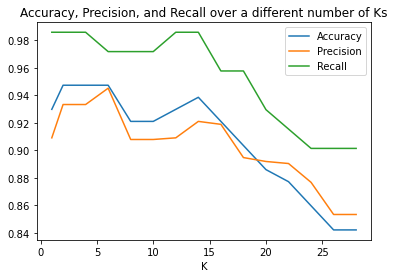

In [339]:
from sklearn import metrics

X_sc = sc.fit_transform(X)

from sklearn.decomposition import PCA 

K_vals = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
acc_list = []
prec_list = []
rec_list = []
for k in K_vals:

    pca = PCA(n_components=k) 
    principalComponents = pca.fit_transform(X_sc) 

    # Split the data into training and test set. 
    # Train with 80% and testing with 20%.
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y, test_size = 0.20, train_size=0.80, random_state=seed)

    clf = GaussianNB()
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    acc_list.append(metrics.accuracy_score(Y_test, Y_pred))
    prec_list.append(metrics.precision_score(Y_test, Y_pred))
    rec_list.append(metrics.recall_score(Y_test, Y_pred))

plt.plot(K_vals, acc_list, label="Accuracy")
plt.plot(K_vals, prec_list, label="Precision")
plt.plot(K_vals, rec_list, label="Recall")
plt.xlabel("K")
plt.title("Accuracy, Precision, and Recall over a different number of Ks")
plt.legend()
plt.show()

In [ ]:
def height(root):
    if root == None:
        return -1
    
    lheight = height(root.left)
    rheight = height(root.right)
    
    if lheight > rheight:
        return lheight+1
    return rheight+1

def printCurrentLevel(root, level):
    if root == None:
        return
    if level == 1:
        print(root.info)
    if level > 1:
        printCurrentLevel(root.left, level-1)
        printCurrentLevel(root.right, level-1)

def levelOrder(root):
    #Write your code here
    h = height(root)
    for i in range(0, h):
        printCurrentLevel(root, i)